## EDA And Feature Engineering Flight Price Prediction
check the dataset info below
https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [221]:
df=pd.read_excel('flight-price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [222]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


# Get the basic info about the data

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [224]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


## feature engineering process

The date is  object not numerical so spliting the date to make it relevant

In [225]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [226]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  object
 12  Month            10683 non-null  object
 13  Year             10683 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [227]:
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int64 
 12  Month            10683 non-null  int64 
 13  Year             10683 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.1+ MB


### Droping data of journey because no longer needed

In [229]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [230]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


### Now dealing with arival time

In [231]:
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x:x.split(' ')[0])
df['Arrival_Time']

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [232]:
df["Arrival_hour"]=df['Arrival_Time'].str.split(':').str[0]
df["Arrival_min"]=df['Arrival_Time'].str.split(':').str[1]


In [233]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [234]:
df["Arrival_hour"]=df['Arrival_hour'].astype(int)
df["Arrival_min"]=df['Arrival_min'].astype(int)

In [235]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [236]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35


### for Dep_Time


In [237]:
df["Dep_hour"]=df['Dep_Time'].str.split(':').str[0]
df["Dep_min"]=df['Dep_Time'].str.split(':').str[1]

In [238]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [239]:
df["Dep_hour"]=df['Dep_hour'].astype(int)
df["Dep_min"]=df['Dep_min'].astype(int)

In [240]:
df.drop('Dep_Time',axis=1,inplace=True)

## NOw converting Total stops 

In [241]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45


In [242]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [243]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [244]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,2019,21,35,16,50


In [245]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min


In [246]:
df['Total_Stops'].mode()

0    1
Name: Total_Stops, dtype: int64

In [247]:
df.drop('Route',axis=1,inplace=True)

### Converting duration into minutes

In [248]:
def convert_duration(duration):
    hours = 0
    mins = 0
    duration = duration.replace('h', 'h ').replace('m', 'm ')
    parts = duration.strip().split()
    for part in parts:
        if 'h' in part:
            hours = int(part.replace('h', ''))
        elif 'm' in part:
            mins = int(part.replace('m', ''))
    return hours, mins

In [249]:
df['Duration_hours'], df['Duration_mins'] = zip(*df['Duration'].apply(convert_duration))


In [250]:
df.drop('Duration', axis=1, inplace=True)


In [251]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,21,35,16,50,4,45


# Encoding

In [252]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [253]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [254]:
df['Additional_Info'].unique()


array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [255]:
from sklearn.preprocessing import OneHotEncoder

In [256]:
encoder=OneHotEncoder()

In [257]:
encoder.fit_transform(df[["Airline","Source","Destination"]]).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(10683, 23))

In [258]:
pd.DataFrame(encoder.fit_transform(df[['Airline','Source','Destination']]).toarray(),columns=encoder.get_feature_names_out())

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10680,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [261]:
df2 = pd.get_dummies(df[['Airline', 'Source', 'Destination', 'Additional_Info']], drop_first=True)


In [262]:
df1 = df.drop(['Airline', 'Source', 'Destination', 'Additional_Info'], axis=1)


In [263]:
final_df = pd.concat([df1.reset_index(drop=True), df2.reset_index(drop=True)], axis=1)


In [265]:
final_df.head()

,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,3897,24,3,2019,1,10,22,20,2,...,True,False,False,False,False,False,False,False,True,False
1,2,7662,1,5,2019,13,15,5,50,7,...,False,False,False,False,False,False,False,False,True,False
2,2,13882,9,6,2019,4,25,9,25,19,...,False,False,False,False,False,False,False,False,True,False
3,1,6218,12,5,2019,23,30,18,5,5,...,False,False,False,False,False,False,False,False,True,False
4,1,13302,1,3,2019,21,35,16,50,4,...,True,False,False,False,False,False,False,False,True,False


In [271]:
final_df

,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,3897,24,3,2019,1,10,22,20,2,...,True,False,False,False,False,False,False,False,True,False
1,2,7662,1,5,2019,13,15,5,50,7,...,False,False,False,False,False,False,False,False,True,False
2,2,13882,9,6,2019,4,25,9,25,19,...,False,False,False,False,False,False,False,False,True,False
3,1,6218,12,5,2019,23,30,18,5,5,...,False,False,False,False,False,False,False,False,True,False
4,1,13302,1,3,2019,21,35,16,50,4,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,2019,22,25,19,55,2,...,False,False,False,False,False,False,False,False,True,False
10679,0,4145,27,4,2019,23,20,20,45,2,...,False,False,False,False,False,False,False,False,True,False
10680,0,7229,27,4,2019,11,20,8,20,3,...,False,False,False,False,False,False,False,False,True,False
10681,0,12648,1,3,2019,14,10,11,30,2,...,True,False,False,False,False,False,False,False,True,False


# Distribution of target variable (Price)


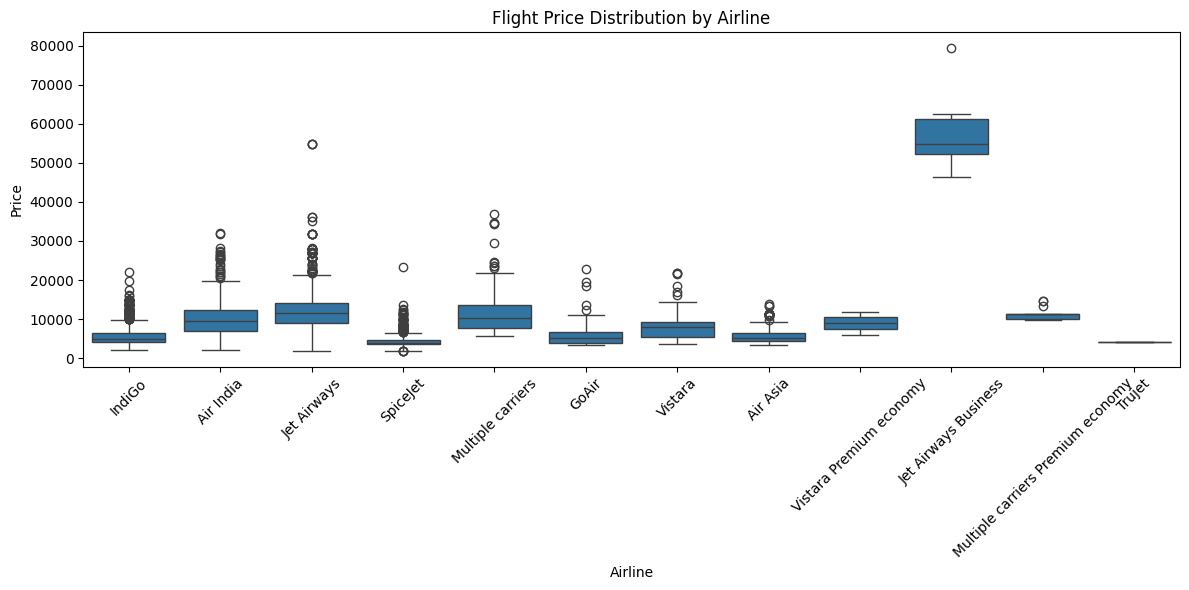

In [279]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Airline', y='Price', data=df)
plt.xticks(rotation=45)
plt.title('Flight Price Distribution by Airline')
plt.ylabel('Price')
plt.xlabel('Airline')
plt.tight_layout()
plt.show()

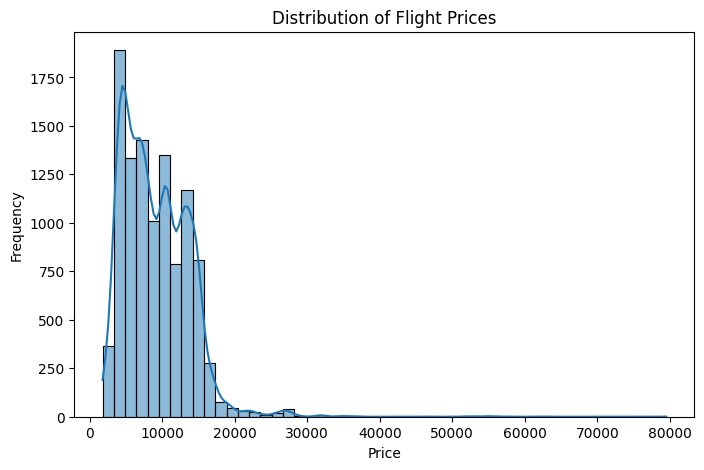

In [281]:
plt.figure(figsize=(8, 5))
sns.histplot(final_df['Price'], kde=True, bins=50)
plt.title("Distribution of Flight Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Correlation heatmap for numerical features


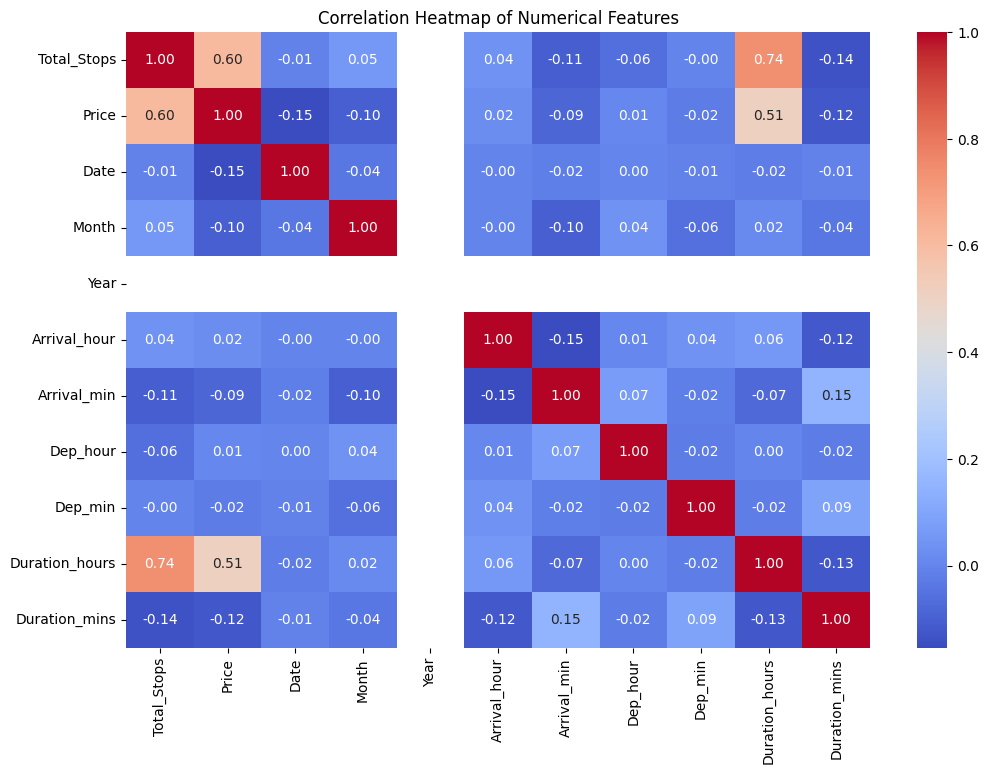

In [285]:
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size":10})
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Boxplot for Total_Stops vs Price


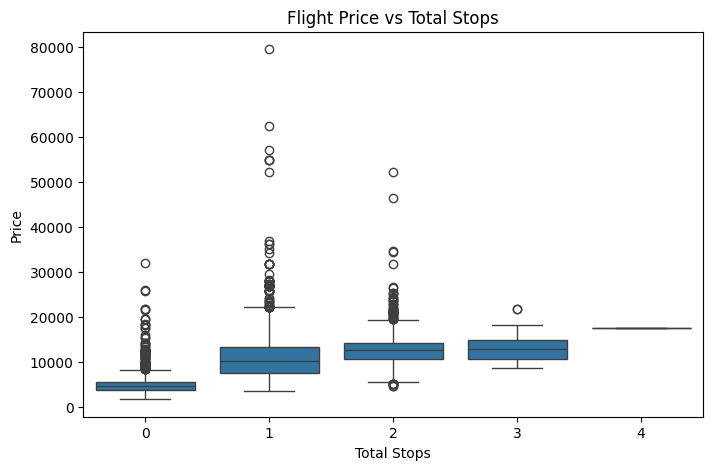

In [286]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Total_Stops', y='Price', data=final_df)
plt.title("Flight Price vs Total Stops")
plt.xlabel("Total Stops")
plt.ylabel("Price")
plt.show()

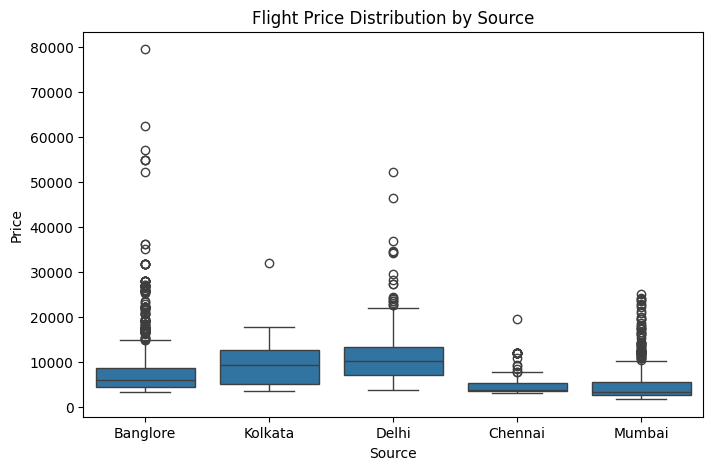

In [289]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Source', y='Price', data=df)
plt.title("Flight Price Distribution by Source")
plt.xlabel("Source")
plt.ylabel("Price")
plt.show()

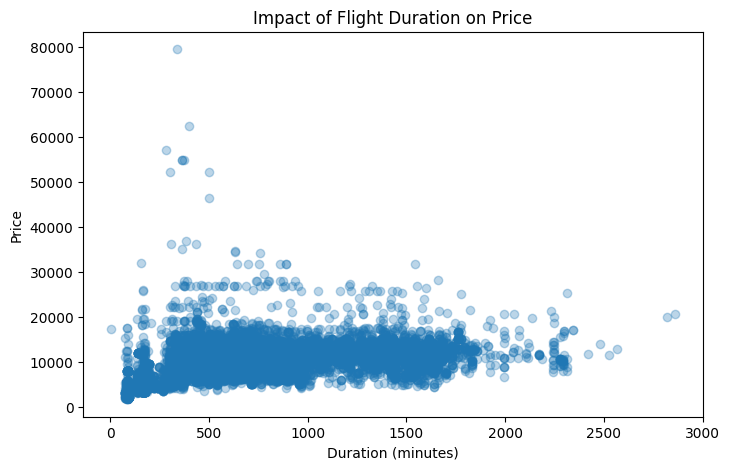

In [290]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Duration_hours'] * 60 + df['Duration_mins'], df['Price'], alpha=0.3)
plt.title("Impact of Flight Duration on Price")
plt.xlabel("Duration (minutes)")
plt.ylabel("Price")
plt.show()

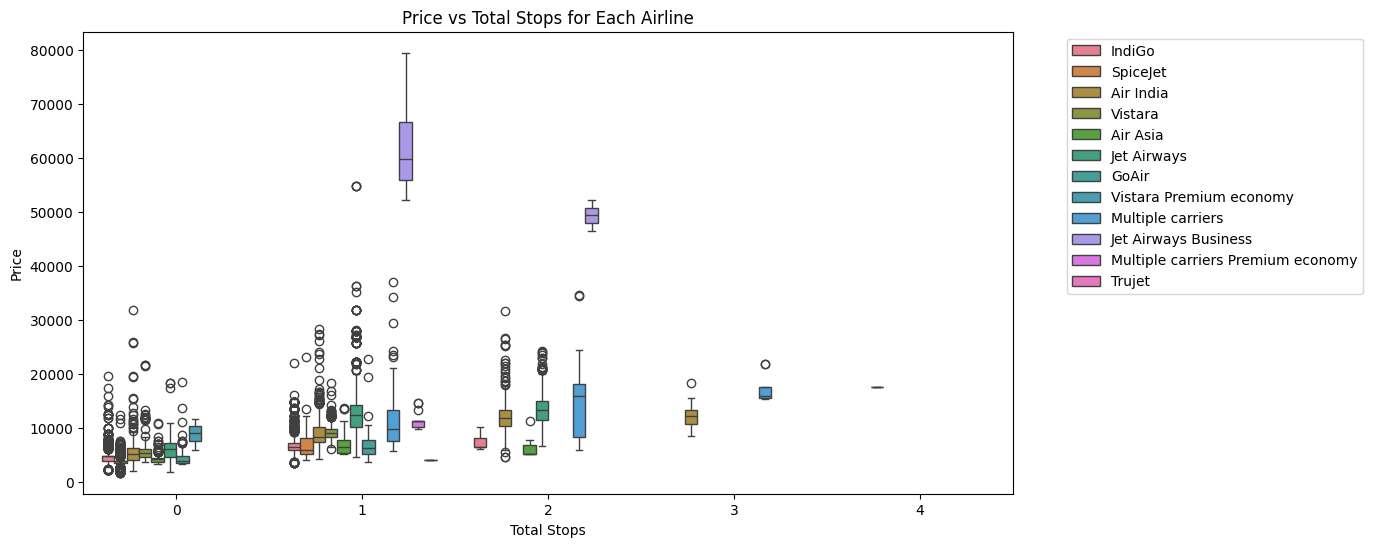

In [291]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Total_Stops', y='Price', hue='Airline', data=df)
plt.title("Price vs Total Stops for Each Airline")
plt.xlabel("Total Stops")
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

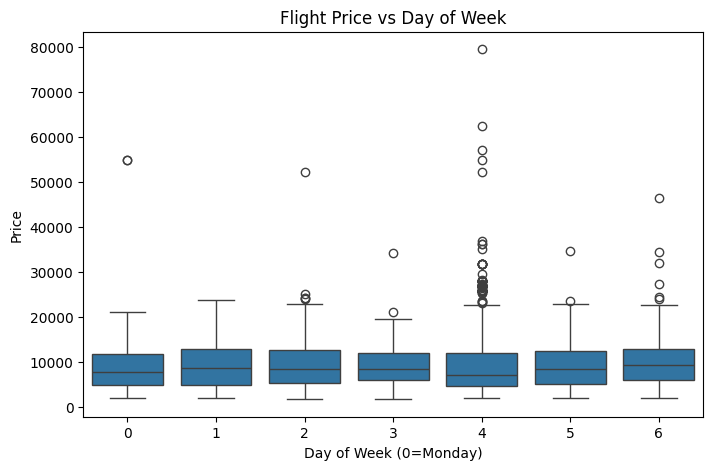

In [292]:
df['DayOfWeek'] = pd.to_datetime(df['Date'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['Year'].astype(str), dayfirst=True).dt.dayofweek
plt.figure(figsize=(8, 5))
sns.boxplot(x='DayOfWeek', y='Price', data=df)
plt.title("Flight Price vs Day of Week")
plt.xlabel("Day of Week (0=Monday)")
plt.ylabel("Price")
plt.show()

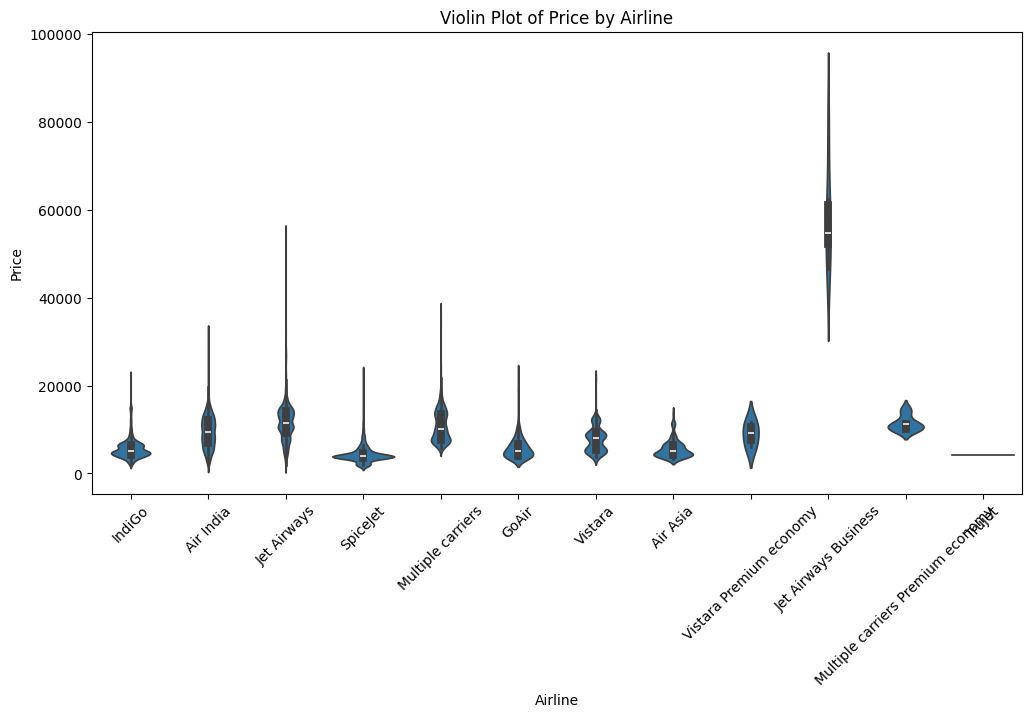

In [294]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Airline', y='Price', data=df)
plt.title("Violin Plot of Price by Airline")
plt.xlabel("Airline")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()